# Import libraries

In [43]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('darkgrid')

import os
from pathlib import Path

from src.scenario import SimulationScenario
scenario = SimulationScenario(None, None, None)

# Load P-control datasets

In [88]:
# GET PATHS
root_path_P = './data/P_controller'

all_seeds_P = list(range(1, 10))
all_seeds_P = list(map(str, all_seeds_P))
print(all_seeds_P)

pathes_P = {}

for path in Path(root_path_P).iterdir():
    seed = str(path).split('seed_')[-1]
    if seed in all_seeds_P:
        pathes_P[seed] = path
display(pathes_P)

# LOAD IN ONE DATASET
total_costs_P = []

for seed in pathes_P:
    seed_obs_df = pd.read_csv(
        pathes_P[seed] / "clean_observations.csv", 
        index_col=0,
    )
    seed_obs_df.rename({'0': seed}, axis=1, inplace=True)
    seed_act_df = pd.read_csv(
        pathes_P[seed] / "actions.csv", 
        index_col=0,
    )
    seed_act_df.rename({'0': seed}, axis=1, inplace=True)
    
    seed_total_cost = scenario.compute_total_objective(
        seed_obs_df.values, 
        actions=seed_act_df.values,
    )
    total_costs_P.append(seed_total_cost)

total_costs_P = np.array(total_costs_P)
central_P = total_costs_P.mean()
stds = total_costs_P.std()
bottom_P = central_P - stds
top_P = central_P + stds

print(f'bottom_P = {bottom_P:.3f}')
print(f'central_P = {central_P:.3f}')
print(f'top_P = {top_P:.3f}')

['1', '2', '3', '4', '5', '6', '7', '8', '9']


{'3': PosixPath('data/P_controller/2024-03-27_122643_seed_3'),
 '4': PosixPath('data/P_controller/2024-03-27_122643_seed_4'),
 '5': PosixPath('data/P_controller/2024-03-27_122643_seed_5'),
 '2': PosixPath('data/P_controller/2024-03-27_122643_seed_2'),
 '7': PosixPath('data/P_controller/2024-03-27_122643_seed_7'),
 '9': PosixPath('data/P_controller/2024-03-27_122643_seed_9'),
 '8': PosixPath('data/P_controller/2024-03-27_122643_seed_8'),
 '1': PosixPath('data/P_controller/2024-03-27_122643_seed_1'),
 '6': PosixPath('data/P_controller/2024-03-27_122643_seed_6')}

bottom_P = 2.267
central_P = 2.643
top_P = 3.019


# Load RL-datasets

In [89]:
# GET PATHS
root_path = './data'

all_seeds = list(range(1, 15))
all_seeds = list(map(str, all_seeds))
print(all_seeds)

pathes = {}

for path in Path(root_path).iterdir():
    seed = str(path).split('seed_')[-1]
    if seed in all_seeds:
        pathes[seed] = path
display(pathes)


# LOAD IN ONE DATASET
learning_curves = []

for seed in pathes:
    seed_df = pd.read_csv(
        pathes[seed] / "learning curve.csv", 
        index_col=0,
    )
    seed_df.rename({'0': seed}, axis=1, inplace=True)
    learning_curves.append(seed_df)
    
learning_curves = pd.concat(learning_curves, axis=1)
learning_curves = learning_curves[all_seeds] # Sort columns
learning_curves.describe()

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']


{'8': PosixPath('data/2024-03-26_221635_seed_8'),
 '12': PosixPath('data/2024-03-26_221635_seed_12'),
 '7': PosixPath('data/2024-03-26_103819_seed_7'),
 '2': PosixPath('data/2024-03-26_103818_seed_2'),
 '9': PosixPath('data/2024-03-26_221635_seed_9'),
 '3': PosixPath('data/2024-03-26_103818_seed_3'),
 '6': PosixPath('data/2024-03-26_103819_seed_6'),
 '14': PosixPath('data/2024-03-26_221635_seed_14'),
 '13': PosixPath('data/2024-03-26_221635_seed_13'),
 '4': PosixPath('data/2024-03-26_103819_seed_4'),
 '11': PosixPath('data/2024-03-26_221635_seed_11'),
 '1': PosixPath('data/2024-03-26_103818_seed_1'),
 '10': PosixPath('data/2024-03-26_221635_seed_10'),
 '5': PosixPath('data/2024-03-26_103819_seed_5')}

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,159.000000,163.000000,116.000000,125.000000,143.000000,136.000000,135.000000
mean,3.509594,2.539125,3.242997,2.590975,2.992448,3.366597,2.526493,3.385179,2.877820,2.763209,3.000231,3.284692,3.278417,2.890752
std,2.815633,0.597689,1.464547,0.534131,0.839903,0.089173,0.517598,0.246022,0.546361,0.457303,0.480104,0.984912,0.488785,0.474897
min,2.029746,1.978085,1.947065,1.971402,1.944724,3.277720,1.981067,3.266646,1.932075,2.218394,2.107344,1.946155,2.080422,2.052069
25%,2.675513,2.061144,2.061144,2.151025,2.507207,3.318071,2.097617,3.303519,2.413260,2.374379,2.682174,2.820023,3.126227,2.648850
50%,3.046134,2.182604,2.770871,2.333226,2.826242,3.335576,2.270462,3.321393,3.098889,2.682387,3.010157,3.092538,3.338934,2.900839
75%,3.340841,3.155271,3.415613,3.171213,3.121285,3.364743,2.999093,3.353683,3.282867,3.057400,3.279818,3.280313,3.614923,3.131649
max,21.468832,4.741112,7.785267,3.769596,6.068163,3.722469,3.973656,5.476902,3.958678,4.659100,4.086982,8.236204,4.327940,3.996705


Let us drop "not-working" seeds

In [90]:
seeds_to_drop = ['1', '3', '5', '6', '12']
learning_curves_selected = learning_curves.drop(seeds_to_drop, axis=1)
learning_curves_selected.describe()

,2,4,7,8,9,10,11,13,14
count,300.000000,300.000000,300.000000,159.000000,163.000000,116.000000,125.000000,136.000000,135.000000
mean,2.539125,2.590975,2.526493,3.385179,2.877820,2.763209,3.000231,3.278417,2.890752
std,0.597689,0.534131,0.517598,0.246022,0.546361,0.457303,0.480104,0.488785,0.474897
min,1.978085,1.971402,1.981067,3.266646,1.932075,2.218394,2.107344,2.080422,2.052069
25%,2.061144,2.151025,2.097617,3.303519,2.413260,2.374379,2.682174,3.126227,2.648850
50%,2.182604,2.333226,2.270462,3.321393,3.098889,2.682387,3.010157,3.338934,2.900839
75%,3.155271,3.171213,2.999093,3.353683,3.282867,3.057400,3.279818,3.614923,3.131649
max,4.741112,3.769596,3.973656,5.476902,3.958678,4.659100,4.086982,4.327940,3.996705


means


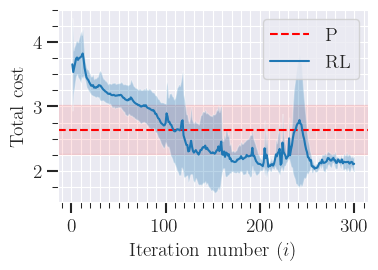

In [99]:
# sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx",
    "font.size": 14,
    "xtick.bottom" : True, 
    "ytick.left" : True,
    'xtick.major.size': 8,
    'xtick.major.width': 1.5,
    'xtick.minor.size': 4,
    'xtick.minor.width': 0.75,
    'ytick.major.size': 8,
    'ytick.major.width': 1.5,
    'ytick.minor.size': 4,
    'ytick.minor.width': 0.75,
})


def plot_total_cost(df, plot_type='means', savefig=False):
    if plot_type == 'means':
        central = df.mean(axis=1)
        stds = df.std(axis=1)
        bottom = central - stds
        top = central + stds
    elif plot_type == 'medians':
        central = df.median(axis=1)
        bottom = df.quantile(0.25, axis=1)
        top = df.quantile(0.75, axis=1)
    print(plot_type)
    
    fig, ax = plt.subplots(1, 1, figsize=(4,2.5))
    ax.set_ylabel("Total cost")
    ax.set_xlabel("Iteration number $(i)$")
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    
    plt.axhline(central_P, linestyle='--', color='r', label='P')
    plt.axhspan(bottom_P, top_P, alpha=0.1, color='r')
    
    central.plot(label='RL')
    plt.fill_between(central.index, bottom, top, alpha=0.3)
    
    plt.legend()
    
    # plt.tight_layout(pad=0.5)
    if savefig:
        plt.savefig("learning_curve.pdf", dpi=400)
    plt.show();

plot_total_cost(learning_curves_selected, savefig=False)
# plot_total_cost(learning_curves_selected, plot_type='medians', savefig=False)

means


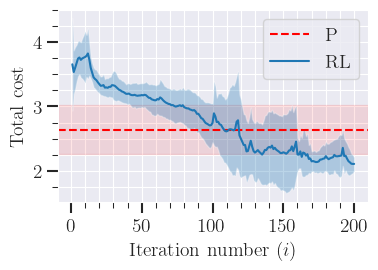

In [102]:
plot_total_cost(learning_curves_selected.iloc[:200], savefig=False)